Taller 2
======

Cuadrados minimos
------

El objetivo del taller es ganar un entendimiento más profundo de los temas que entran en el segundo parcial.
Por tal motivo, se deben resolver los siguientes ejercicios y responder las preguntas justificando adecuadamente.


## Ejercicio 1
Dada la siguiente matriz
$$
A =
\begin{pmatrix}
	1 & \sqrt{3} & 0 \\
	\sqrt{3} & 4 & \sqrt{3}/2 \\
	0 & \sqrt{3}/2 & 7/4
\end{pmatrix}
$$

Hallar $A = U \Sigma V^t$ la descomposición en valores singulares de $A$ utilizando únicamente la función `eig` de Numpy para calcular los autovalores y autovectores necesarios.


In [135]:
import numpy as np
from numpy.linalg import eig
np.set_printoptions(suppress=True)  # elimino notacion cientifica

A = np.array([[1,          np.sqrt(3),   0           ],
              [np.sqrt(3), 4,            np.sqrt(3)/2],
              [0,          np.sqrt(3)/2, 7/4         ]])

# COMPLETAR

# Es simétrics => A = UEVt => V = U
E, U = np.linalg.eig(A)

# Ordenar autovalores
idx = E.argsort()[::-1]   
E = E[idx]
U = U[:,idx]

D = np.diag(E)
(U) @ D @ np.transpose(U)
np.allclose(A, (U) @ D @ np.transpose(U))


True

## Ejercicio 2

Dado el siguiente sistema lineal sobredeterminado:
$$
\begin{pmatrix}
1  & 0  & 0 \\
0  & 1  & 0 \\
0  & 0  & 1 \\
-1 & 1  & 0 \\
0  & -1 & 0 \\
-1 & 0  & 1
\end{pmatrix}
%
\begin{pmatrix}
x_a \\
x_b \\
x_c
\end{pmatrix}
=
\begin{pmatrix}
1 \\ 
2 \\ 
3 \\
1 \\
2 \\
1
\end{pmatrix}
$$
Resolver mediante cuadrados mínimos (utilizando ecuaciones normales). 

- Verificar que el residuo es ortogonal a las columnas de la matriz A. ¿A qué subespacio pertenece el residuo?

- ¿Cómo se relaciona el punto anterior con las ecuaciones normales? Justificar


In [114]:
A = np.array([[1, 0, 0],
              [0, 1, 0],
              [0, 0, 1],
              [-1,1, 0],
              [0,-1, 0],
              [-1,0, 1]])

b = np.array([1, 2, 3, 1, 2, 1])

At = np.transpose(A)

AtA = At @ A
Atb = At @ b

x = np.linalg.solve(At @ A, At @ b)

R = (b - A @ x)

print("El Residuo es ortogonal a las columnas de A (At R == 0) : {}"
      .format(np.allclose(At @ R, np.zeros(3))))
print()
print("Si el residuo = Ax - b es ortogonal a las columnas de A,",
      "entonces At @ R da 0, porque es como hacer el producto interno",
      "de las columnas de A por r.")

El Residuo es ortogonal a las columnas de A (At R == 0) : True

Si el residuo = Ax - b es ortogonal a las columnas de A, entonces At @ R da 0, porque es como hacer el producto interno de las columnas de A por r.


## Ejercicio 3

Completar los métodos de Jacobi y Gauss-Seidel  para resolver las ecuaciones normales de cuadrados mínimos mediante los mencionados métodos iterativos. 

Realizar lo siguiente:
- Explicar el problema: ¿Cómo son los datos? ¿Cómo los queremos aproximar?
- Probar distintos valores de cantidad de iteraciones e inicialización del vector solución. 
- Graficar los errores y la función aproximada por cuadrados mínimos.
- ¿Qué puede decir sobre los valores estimados de los coeficientes de mayor grado?


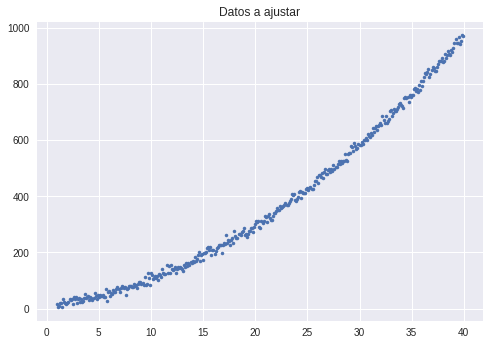

In [115]:
import numpy as np
import matplotlib.pyplot as plt

# Datos: polinomio de grado 2 (con ruido).
t = np.arange(1, 40, 0.1)
y = 1/2 * t ** 2 + 4 * t + 15
y = y + np.random.randn(*t.shape) * 10  # Agrego ruido

plt.plot(t, y, '.')
plt.title('Datos a ajustar')
plt.show()


In [116]:
# Ecuaciones normales de cuadrados minimos
# Vamos a fitear por un polinomio de grado 4

A = np.stack([np.ones(t.shape), t, t ** 2, t ** 3, t ** 4]).T
b = y

AtA = A.T @ A  # @ es una abreviacion de `np.matmul`
Atb = A.T @ b

correct_ans = np.linalg.solve(AtA, Atb)

np.set_printoptions(suppress=True)  # elimino notacion cientifica
print(correct_ans)

[10.73067082  4.91359959  0.44987258  0.00100203 -0.00000644]


In [0]:
# Matrices para los metodos iterativos
D = np.diag(np.diag(AtA))
L = -np.tril(AtA, -1)
U = -np.triu(AtA, 1)

In [118]:
eigen = np.linalg.eigvals(T)
np.max(eigen)

0.9999841874535437

Jacobi:
Estimacion: [3.53194344e+15 1.81003474e+14 5.92337397e+12 1.71921023e+11
 4.73536480e+09]
Respuesta correcta [10.73067082  4.91359959  0.44987258  0.00100203 -0.00000644]
Radio espectral: 3.4564001412353735


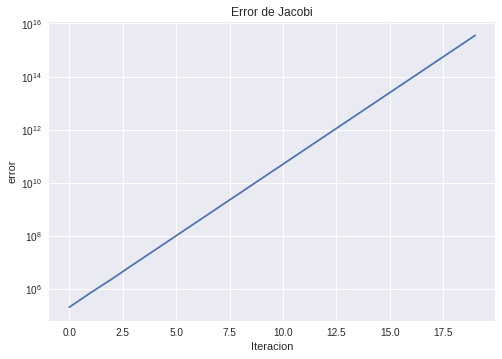

In [122]:
# Jacobi
Dinv = np.linalg.inv(D)
T = Dinv @ (L + U)
c = Dinv @ Atb
reps = 20
xi = np.random.rand(5)
error = []
for i in range(reps):
    xi = c - (T@xi)
    error.append(np.linalg.norm(xi - correct_ans))

print("Jacobi:")
print("Estimacion:", xi)
print("Respuesta correcta", correct_ans)
eigs = np.linalg.eigvals(T)
print("Radio espectral: {}".format(abs(max(abs(np.min(eigs)),
                                           abs(np.max(eigs))))))

plt.plot(error)
plt.title("Error de Jacobi")
plt.xlabel("Iteracion")
plt.ylabel("error")
plt.yscale('log')
plt.show()

In [124]:
# Vemos que T es diag dominante
diag = np.abs(np.diag(T))
sumCols = np.abs(T).sum(axis=0) - diag
print("La T de Jacobi es diagonal dominante: {}".format(np.all(diag >= sumCols)))

La T de Jacobi es diagonal dominante: False


Gauss-Seidel:
Estimacion: [10.73067082  4.91359959  0.44987258  0.00100203 -0.00000644]
Respuesta correcta [10.73067082  4.91359959  0.44987258  0.00100203 -0.00000644]
Radio espectral: 0.9999683095369567


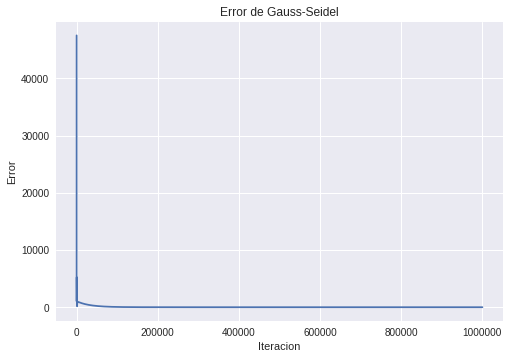

In [129]:
# Gauss-Seidel
DLInv = np.linalg.inv(D-L)
T = DLInv @ U
c = DLInv @ Atb
reps = 1000000;
xi = np.random.rand(5)
error = []
for i in range(reps):
    xi = c + T @ xi
    error.append(np.linalg.norm(xi - correct_ans))

print("Gauss-Seidel:")
print("Estimacion:", xi)
print("Respuesta correcta", correct_ans)
eigs = np.linalg.eigvals(T)
print("Radio espectral: {}".format(abs(max(abs(np.min(eigs)), abs(np.max(eigs))))))


plt.plot(error)
plt.title("Error de Gauss-Seidel")
plt.xlabel("Iteracion")
plt.ylabel("Error")
plt.show()


In [132]:
# Vemos que T es diag dominante
diag = np.abs(np.diag(T))
sumCols = np.abs(T).sum(axis=0) - diag
print("La T de Gauss-Seidel es diagonal dominante: {}".format(np.all(diag >= sumCols)))

La T de Gauss-Seidel es diagonal dominante: False


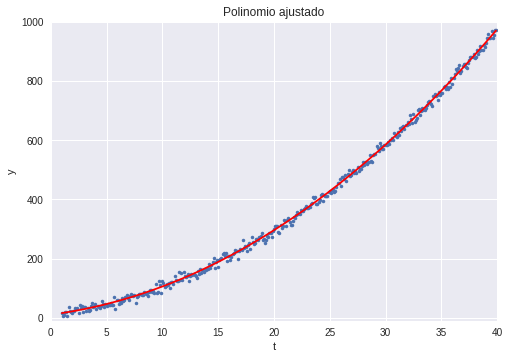

In [134]:
plt.plot(t, y, '.')
#pred = xi[0] * t + xi[1] * t**2 + xi[2] * t**3 + xi[3] * t**4
pred = xi[0] + xi[1] * t + xi[2] * t**2 + xi[3] * t**3 + xi[4] * t**4
plt.plot(t, pred, 'r')
plt.title("Polinomio ajustado")
plt.xlabel("t")
plt.ylabel("y")
plt.xlim(0, 40)
plt.ylim(-10, 1000)
plt.show()
# np.transpose(A)


## Ejercicio 4

Para el punto anterior, indicar si los métodos convergen o no y por qué. ¿Qué propiedades pueden aplicar para explicar la convergencia (o falta de ella) para cada método?
Justificar adecuadamente.

**Respuesta**:

## Evaluación y entrega

- La evaluación será mediante un coloquio con los docentes durante la clase.
- El taller se realiza en grupos. Se recomienda que sean los mismos de los TPs.
- En caso de no asistir a clase, se debe entregar la resolución del taller por mail a metnum.lab@gmail.com hasta el día **Domingo 3 de Junio de 2018** justificando todas las respuestas.
